In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

## 2-qubit system 








In [28]:
#circuit for the Oracle for |w> = |01> 

def circuitFor01(n):
    
    grover_circuit = QuantumCircuit(n)

    # add Hadamard gate to each qubit to get the initial state |s> 
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    # apply Oracle U_f
    grover_circuit.x(0)
    grover_circuit.cz(0,1)
    grover_circuit.x(0)
    grover_circuit.barrier()
                    
    # apply reflection U_s     
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    for qubit in range(n):
        grover_circuit.z(qubit)

    grover_circuit.cz(0,1)
    # end of reflection U_s 
    
    
    # add Hadamard gate to get the final state out of superpositioned state function 
    for qubit in range(n):
        grover_circuit.h(qubit)


    return grover_circuit

In [29]:
def excute_circuit(quantum_circuit):
    backend_sim = Aer.get_backend('statevector_simulator')
    job_sim = execute(quantum_circuit, backend_sim)
    statevec = job_sim.result().get_statevector()
    quantum_circuit.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(quantum_circuit, backend=backend, shots=shots).result()
    answer = results.get_counts()
    
    return answer

## 2-qubit circuit with marked state |00>

The following figure shows the evolution of state function after each gate, 
leading to the final marked state 

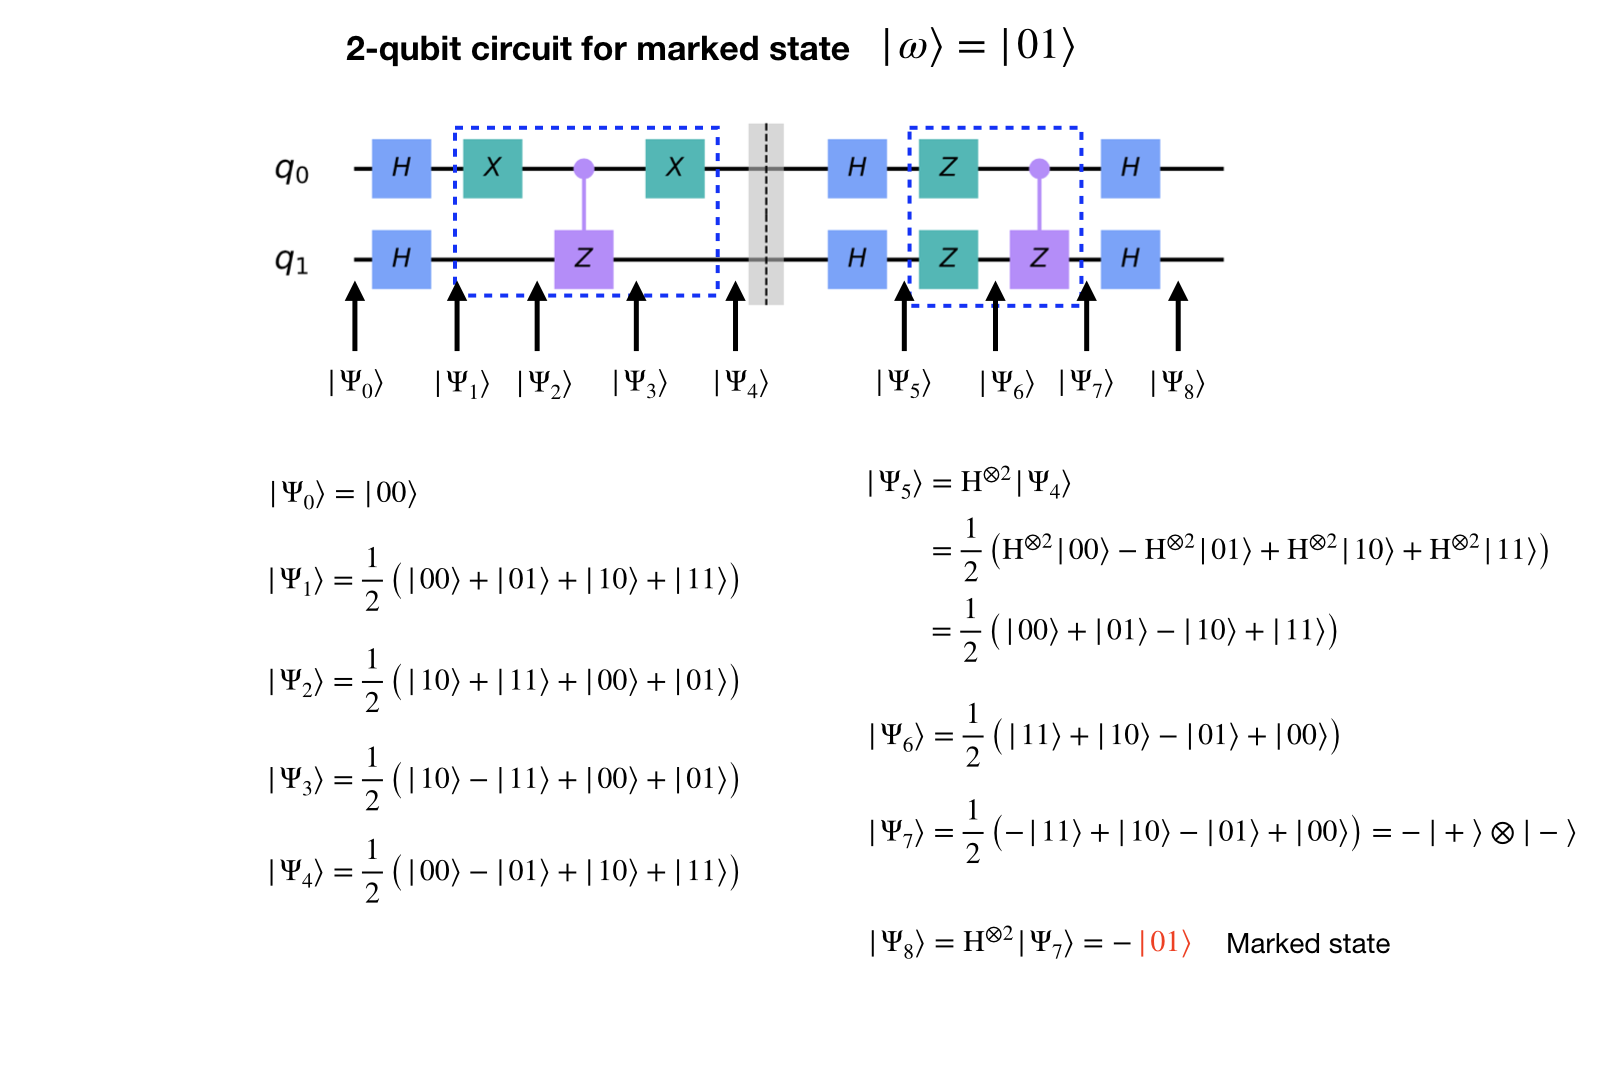

In [73]:
from IPython.display import Image
Image(filename='/Users/gimoonnam/Desktop/QCcircuit/grover_2-qubit_01.png')

The QC simulation result yields the expected marked state shown as below. 

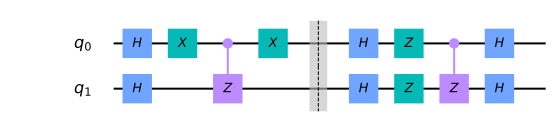

{'10': 1024}


In [55]:
n=2
qc01 = circuitFor01(n)
display(qc01.draw('mpl'))
answer = excute_circuit(qc01)
plot_histogram(answer)
print(answer)

Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_rome
Job Status: job has successfully run


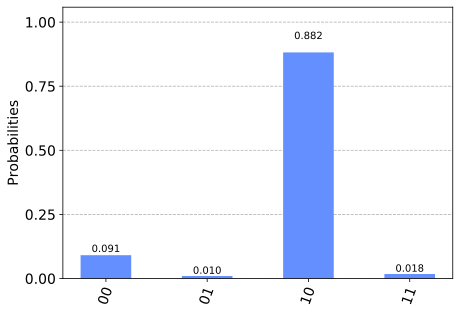

In [57]:
from qiskit.tools.monitor import job_monitor
# Load local account information
IBMQ.load_account()

# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


shots = 1024 # 2^10 
job = execute(qc01, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)


results = job.result()
ansFromRealCom = results.get_counts(qc01)
plot_histogram(ansFromRealCom)

In [65]:
print(ansFromRealCom)
for key, value in ansFromRealCom.items():
    print(key, '\t', value, '\t', value/1024)

{'00': 93, '10': 903, '01': 10, '11': 18}
00 	 93 	 0.0908203125
10 	 903 	 0.8818359375
01 	 10 	 0.009765625
11 	 18 	 0.017578125


## 2-qubit circuit with marked state |10>

The following figure shows the evolution of state function after each gate, 
leading to the final marked state 

In [66]:
#circuit for the Oracle for |w> = |10> 

def circuitFor10(n):
    
    grover_circuit = QuantumCircuit(n)

    # add Hadamard gate to each qubit to get the initial state |s> 
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    
    # apply Oracle U_f
    grover_circuit.x(1)
    grover_circuit.cz(0,1)
    grover_circuit.x(1)
    grover_circuit.barrier()
    # end of Oracele U_f 
                
    # apply reflection U_s     
    for qubit in range(n):
        grover_circuit.h(qubit)
        
    for qubit in range(n):
        grover_circuit.z(qubit)

    grover_circuit.cz(0,1)
    # end of reflection U_s 
    
    
    # add Hadamard gate to get the final state out of superpositioned state function 
    for qubit in range(n):
        grover_circuit.h(qubit)


    return grover_circuit

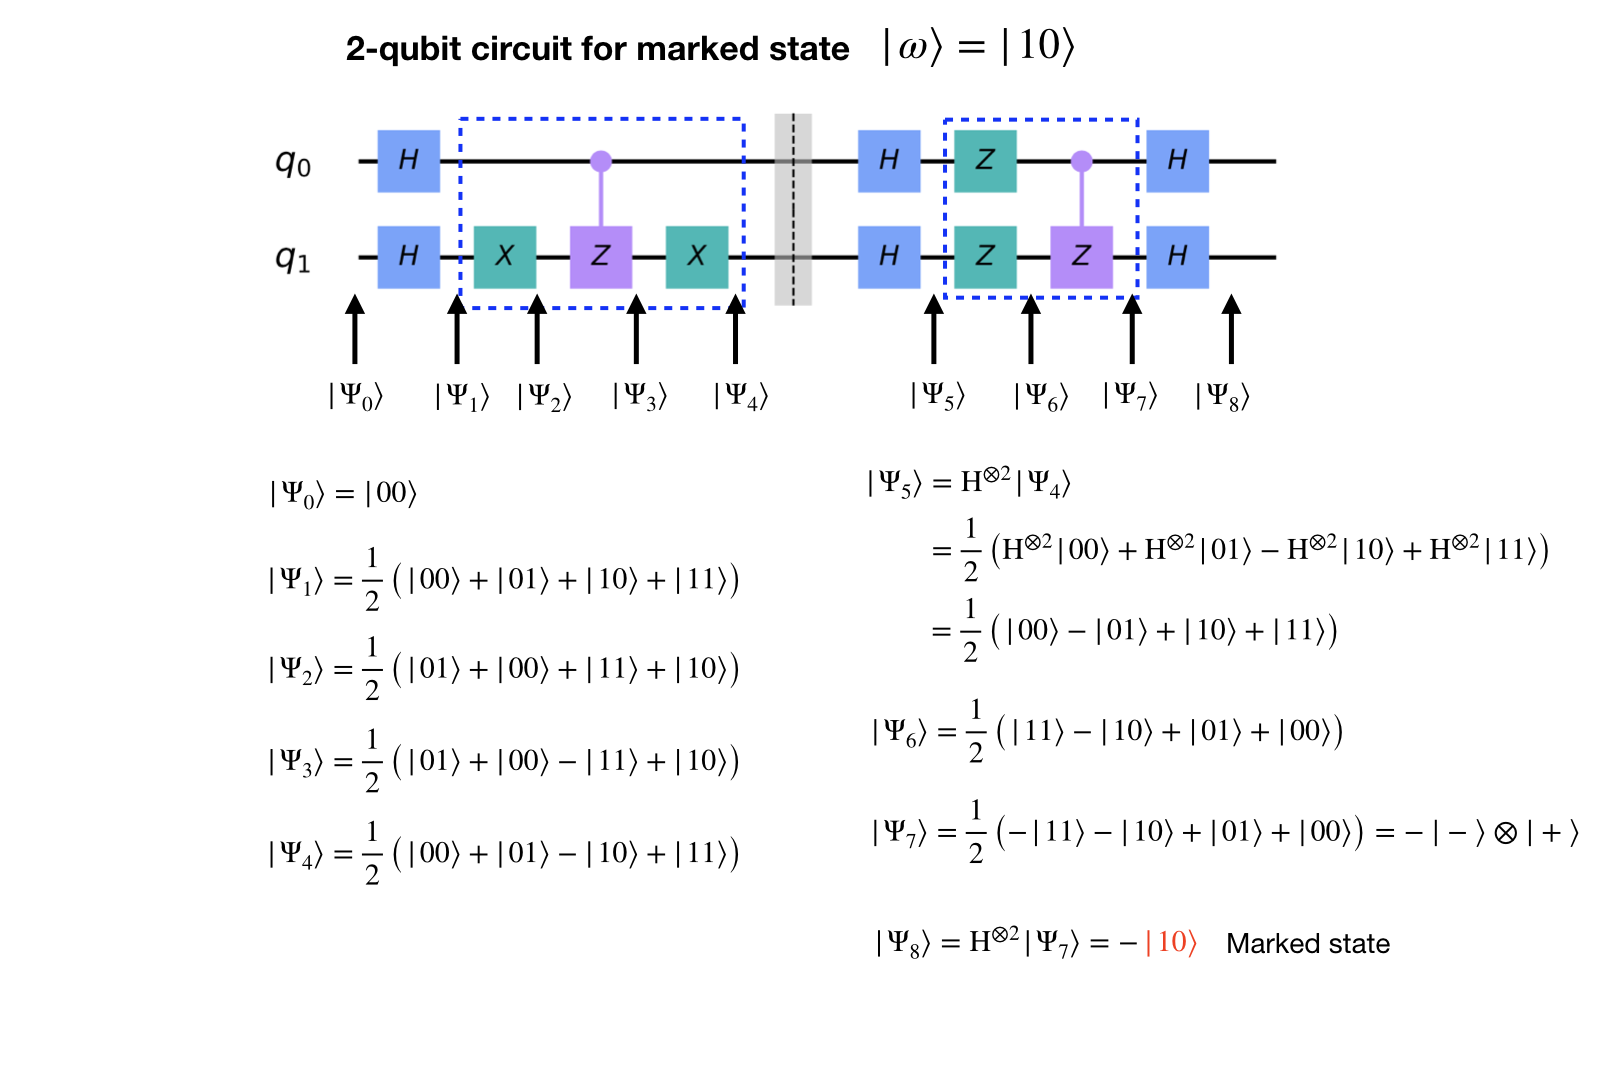

In [74]:
from IPython.display import Image
Image(filename='/Users/gimoonnam/Desktop/QCcircuit/grover_2-qubit_10.png')

The QC simulation result yields the expected marked state shown as below. 

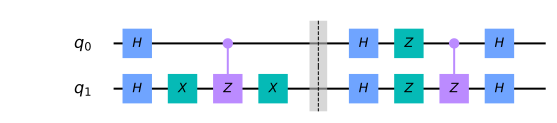

01 	 1024 	 1.0


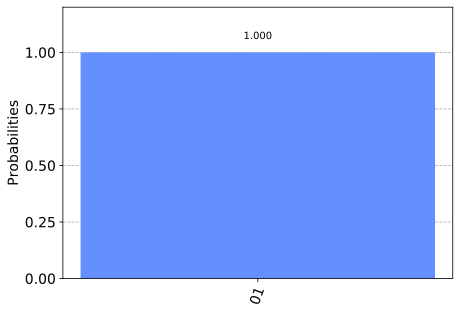

In [69]:
qc10 = circuitFor10(n)
display(qc10.draw('mpl'))
answer_10 = excute_circuit(qc10)
for key, value in answer_10.items():
    print(key, '\t', value, '\t', value/1024)

display(plot_histogram(answer_10))

least busy backend:  ibmq_rome
Job Status: job has successfully run
{'00': 58, '10': 3, '01': 952, '11': 11}
00 	 58 	 0.056640625
10 	 3 	 0.0029296875
01 	 952 	 0.9296875
11 	 11 	 0.0107421875


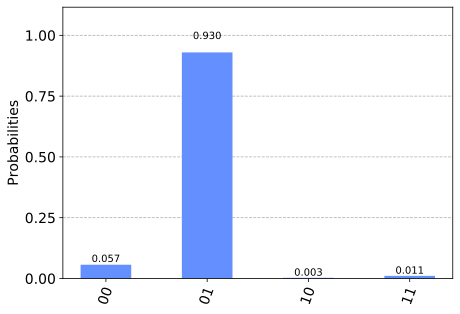

In [70]:
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


shots = 1024
job = execute(qc10, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)


results = job.result()
ansFromRealCom_10 = results.get_counts(qc10)

print(ansFromRealCom_10)
for key, value in ansFromRealCom_10.items():
    print(key, '\t', value, '\t', value/1024)
    
display(plot_histogram(ansFromRealCom_10))
